<a href="https://colab.research.google.com/github/jsmnkjm/projects/blob/main/DS_%7C_Telco_Churn_Analytics_%7C_J_Kijam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churn Analytics
**BUSINESS QUESTION:**   ***Which Telco customer is most likely to churn?***

Using the **OSEMN** framework, here's a step-by-step approach to solving our business question.

**O = Obtain | S = Scrub | E = EDA | M = Modeling | N = Interpret


# **O | Obtaining the dataset**

In [1]:
# Importing the usual Python libraries

import pandas as pd
import seaborn as sns

In [2]:
# Reading the dataset (hosted under LEAD's Github account)

df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv')

In [ ]:
# Taking a first look at the types of data and the null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Taking a look at what we actually have to work with
# df.sample()
# df.tail()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **S | Scrubing the dataset**

In [3]:
# Converting column headers to lowercase

df.columns = ['customer_id', 'gender',	'senior_citizen',	'partner', 'dependents',	'tenure',	'phone_service', 'multiple_lines',
              'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
              'streaming_movies',	'contract',	'paperless_billing', 'payment_method', 'monthly_charges',	'total_charges', 'churn']

df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Convert the datatype of 'total_charges' from object to float, where any errors will take on NaN

df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [ ]:
# Check the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [5]:
# Convert our categorical data to numerics for modeling (object to integer)
# Convert binary columns using a list

binary_columns = ['partner', 'dependents', 'paperless_billing', 'churn', 'phone_service']

for column in binary_columns:
  df[column] = df[column].map({'No': 0, 'Yes': 1})

In [ ]:
# Check our converted values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   int64  
 4   dependents         7043 non-null   int64  
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   int64  
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [ ]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
# Checking the unique values for each column (column by column) DO NOT RUN

df['phone_service'].unique()
df['multiple_lines'].unique()
df['internet_service'].unique()
df['online_security'].unique()
df['online_backup'].unique()
df['device_protection'].unique()
df['tech_support'].unique()
df['streaming_tv'].unique()
df['streaming_movies'].unique()
df['contract'].unique()
df['payment_method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
# Checking the unique values for each column (all)

for col in list(df):
    print(col)
    print(df[col].unique())
    print('-----------------')

customer_id
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-----------------
gender
['Female' 'Male']
-----------------
senior_citizen
[0 1]
-----------------
partner
[1 0]
-----------------
dependents
[0 1]
-----------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-----------------
phone_service
[0 1]
-----------------
multiple_lines
['No phone service' 'No' 'Yes']
-----------------
internet_service
['DSL' 'Fiber optic' 'No']
-----------------
online_security
['No' 'Yes' 'No internet service']
-----------------
online_backup
['Yes' 'No' 'No internet service']
-----------------
device_protection
['No' 'Yes' 'No internet service']
-----------------
tech_support
['No' 'Yes' 'No internet service']
-----------------
streaming_tv
['No' 'Yes' 'No internet service']
-

In [6]:
# Convert our categorical data to numerics where we limit the array to 0 and 1 using the map function
# Convert similar values simultaneously 

binary_columns2 = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

for column in binary_columns2:
  df[column] = df[column].map({'No': 0, 'Yes': 1, 'No internet service': 0})


In [ ]:
# Check our converted values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   int64  
 4   dependents         7043 non-null   int64  
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   int64  
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   int64  
 10  online_backup      7043 non-null   int64  
 11  device_protection  7043 non-null   int64  
 12  tech_support       7043 non-null   int64  
 13  streaming_tv       7043 non-null   int64  
 14  streaming_movies   7043 non-null   int64  
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [7]:
# Convert the rest of the categorical to numerical

df['gender'] = df['gender'].map({'Male': 0, 'Female':1})

In [ ]:
# Checking after conversion

df['gender'].unique()

array([1, 0])

In [8]:
df['multiple_lines'] = df['multiple_lines'].map({'No':0, 'Yes':1, 'No phone service':0})

In [ ]:
df['multiple_lines'].unique()

array([0, 1])

In [ ]:
# Checking to see the total null values after conversion

df.isnull().sum()

customer_id           0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   int64  
 2   senior_citizen     7043 non-null   int64  
 3   partner            0 non-null      float64
 4   dependents         0 non-null      float64
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   int64  
 7   multiple_lines     0 non-null      float64
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   int64  
 10  online_backup      7043 non-null   int64  
 11  device_protection  7043 non-null   int64  
 12  tech_support       7043 non-null   int64  
 13  streaming_tv       7043 non-null   int64  
 14  streaming_movies   7043 non-null   int64  
 15  contract           7043 non-null   object 
 16  paperless_billing  0 non

In [9]:
# For nominal data, we use dummies to convert the datatype into integer

df = pd.get_dummies(data=df, columns=['internet_service'])
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,internet_service_DSL,internet_service_Fiber optic,internet_service_No
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


In [10]:
df = pd.get_dummies(data=df, columns=['payment_method'])

In [11]:
df = pd.get_dummies(data=df, columns=['contract'])
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_DSL,internet_service_Fiber optic,internet_service_No,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,contract_Month-to-month,contract_One year,contract_Two year
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,0,0,1,0,1,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,1,0,0,0,0,1,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,0,0,1,0,1,0,0


# **E | Exploratory Data Analysis (EDA)**

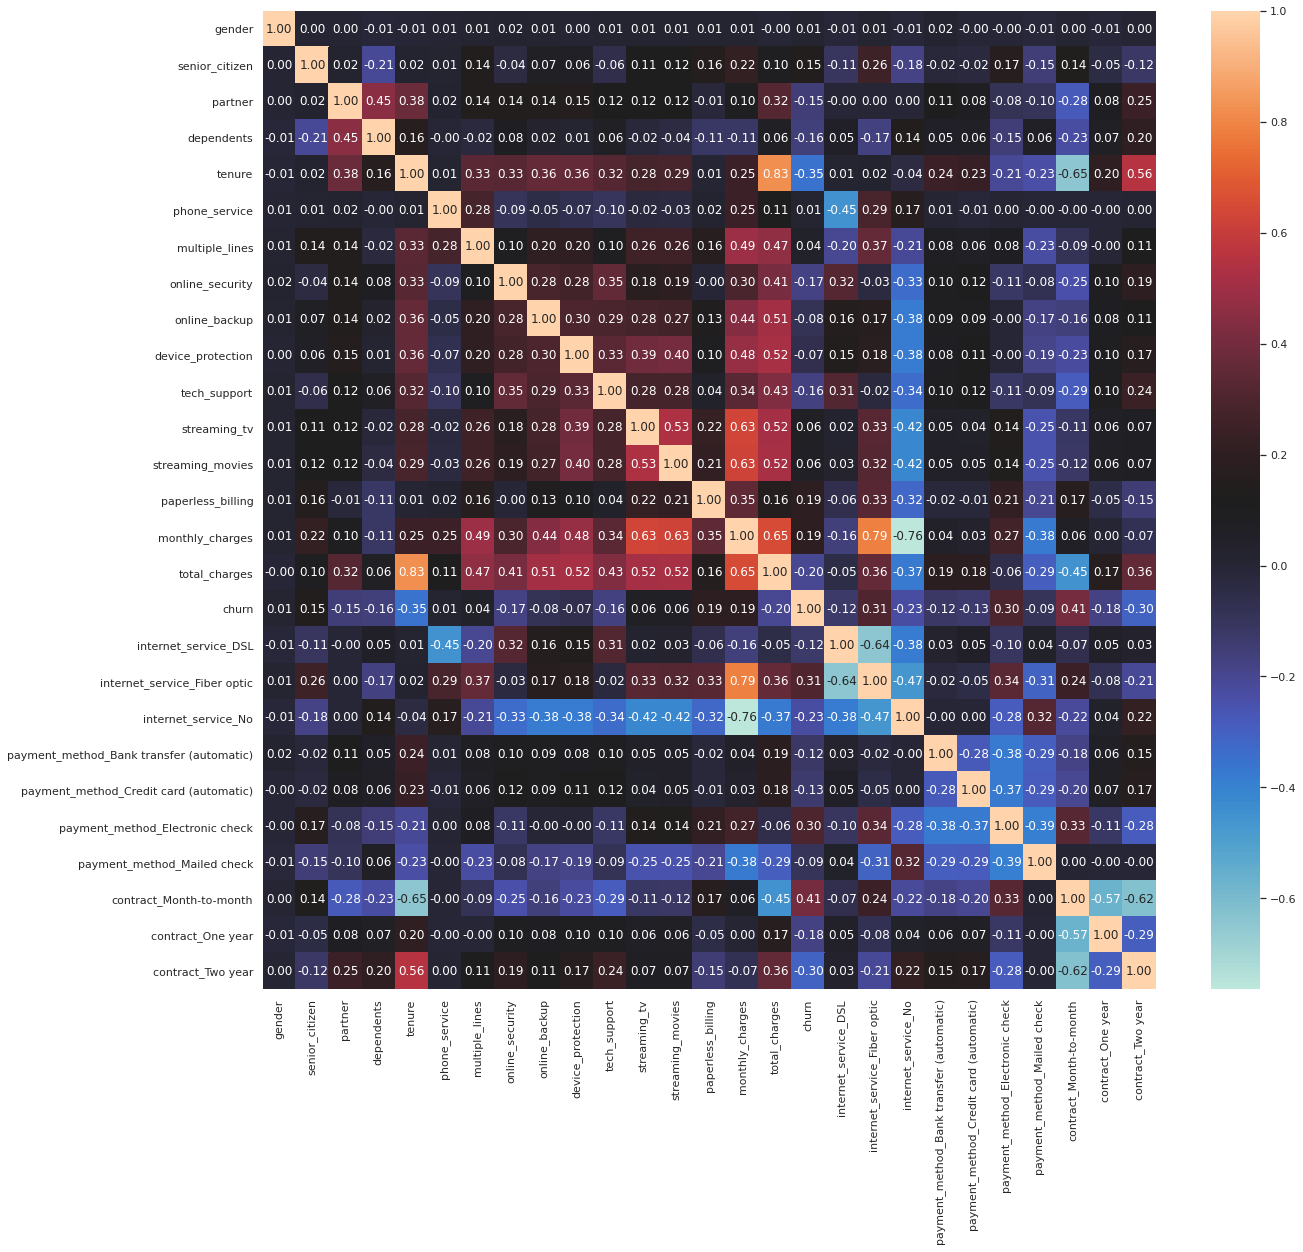

In [ ]:
# Finding the correlation between columns using seaborn

sns.set(rc={'figure.figsize':(20,18)})

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='icefire')

From the heatmap we can see that some features have a higher influence on the churn rate of telco customers.

Features that **positively** affect the churn rate:

- 'senior_citizen' (0.15)
- 'paperless_billing' (0.19)
- 'monthly_charges' (0.19)
- 'internet_service Fiber optic' (0.31)
- 'payment_method Electronic check' (0.30)
- 'contract_Month-to-month' (0.41)

Positive correlation means that the higher the value/yes, the more likely that customers churn. We can see that customers are more likely to churn if they use fiber optic internet service, pay by electronic check, and subscribe to a month-to-month contract. 

Features that **negatively** effect the churn rate:

- 'partner' (-0.15)
- 'dependents' (-0.16)
- 'tenure' (-0.35)
- 'online_security' (-0.17)
- 'tech_support' (-0.16)
- 'total_charges' (-0.20)
- 'internet_service_DSL' (-0.12)
- 'internet_service_No' (-0.23)
- 'payment_method_Bank transfer (automatic)' (-0.12)
- 'payment_method_Credit card (automatic)' (-0.13)
- 'contract_One year' (-0.18)
- 'contract_Two year' (-0.30)

Negative correlation means that the higher the value/yes, the less likely that customers churn. We can see that customers are less likely to churn if they have a longer tenure, have no internet service, and subscribe to a two year contract. 

In [ ]:
# Show the values of each column to determine missing values and rough idea of dataset

df.describe()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_DSL,internet_service_Fiber optic,internet_service_No,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,contract_Month-to-month,contract_One year,contract_Two year
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669,0.219225,0.216101,0.335794,0.228880,0.550192,0.209144,0.240664
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004,0.413751,0.411613,0.472301,0.420141,0.497510,0.406726,0.427517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the churn rate of the dataset is 26.53%. Now, we need to deal with the missing values under 'total_charges'.

In [16]:
# Drop the rows with missing values (NA)

df = df.dropna()

In [ ]:
# Checking the dataset

df.describe()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_DSL,internet_service_Fiber optic,internet_service_No,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,contract_Month-to-month,contract_One year,contract_Two year
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.343572,0.440273,0.216155,0.219283,0.216297,0.336320,0.228100,0.551052,0.209329,0.239619
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.474934,0.496455,0.411650,0.413790,0.411748,0.472483,0.419637,0.497422,0.406858,0.426881
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Importing library to generate visualizations

from matplotlib import pyplot as plt

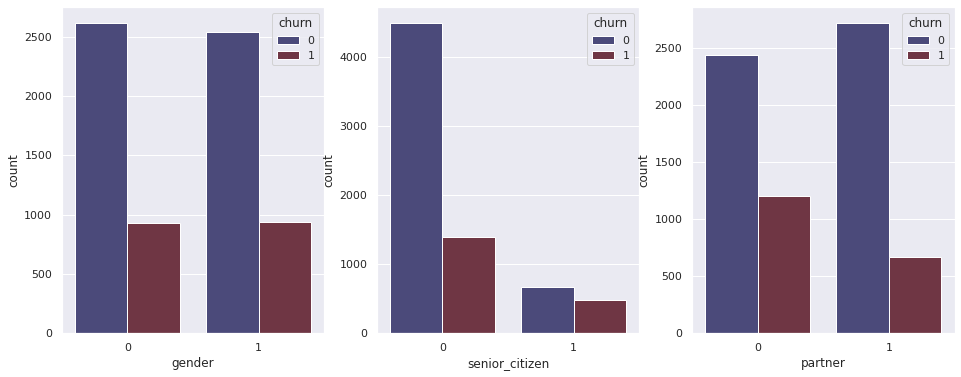

In [ ]:
# Creating subplots to visualize the categorical data vs churn rate

main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x='gender', hue='churn', ax=subplots[0], palette='icefire')
sns.countplot(data=df, x='senior_citizen', hue='churn', ax=subplots[1], palette='icefire')
sns.countplot(data=df, x='partner', hue='churn', ax=subplots[2], palette='icefire')

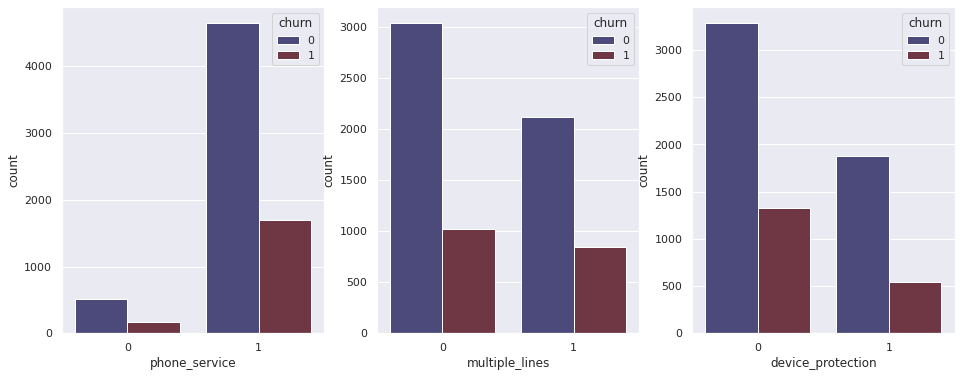

In [ ]:
# Creating subplots

main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x='phone_service', hue='churn', ax=subplots[0], palette='icefire')
sns.countplot(data=df, x='multiple_lines', hue='churn', ax=subplots[1], palette='icefire')
sns.countplot(data=df, x='device_protection', hue='churn', ax=subplots[2], palette='icefire')

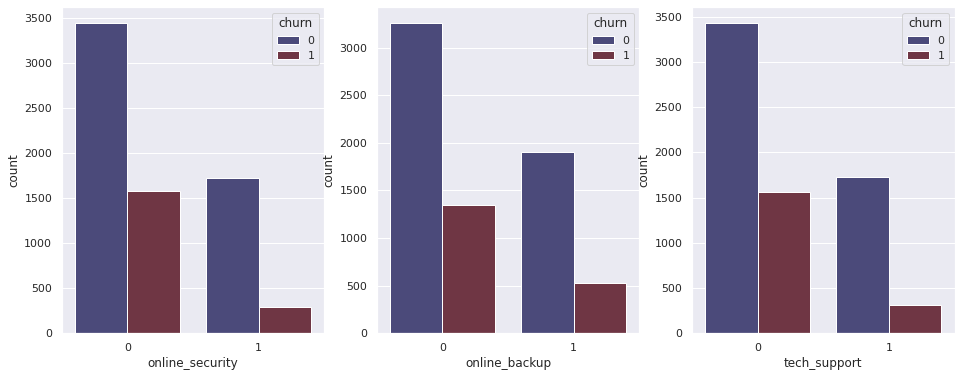

In [ ]:
# Creating subplots

main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x='online_security', hue='churn', ax=subplots[0], palette='icefire')
sns.countplot(data=df, x='online_backup', hue='churn', ax=subplots[1], palette='icefire')
sns.countplot(data=df, x='tech_support', hue='churn', ax=subplots[2], palette='icefire')

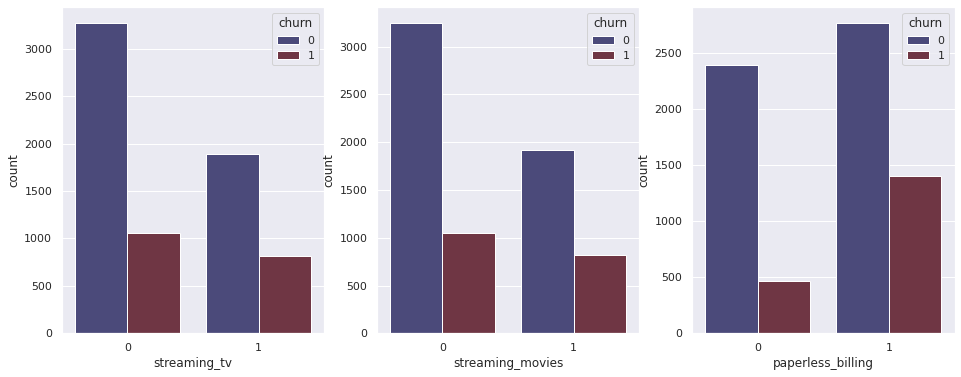

In [ ]:
# Creating subplots

main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x='streaming_tv', hue='churn', ax=subplots[0], palette='icefire')
sns.countplot(data=df, x='streaming_movies', hue='churn', ax=subplots[1], palette='icefire')
sns.countplot(data=df, x='paperless_billing', hue='churn', ax=subplots[2], palette='icefire')

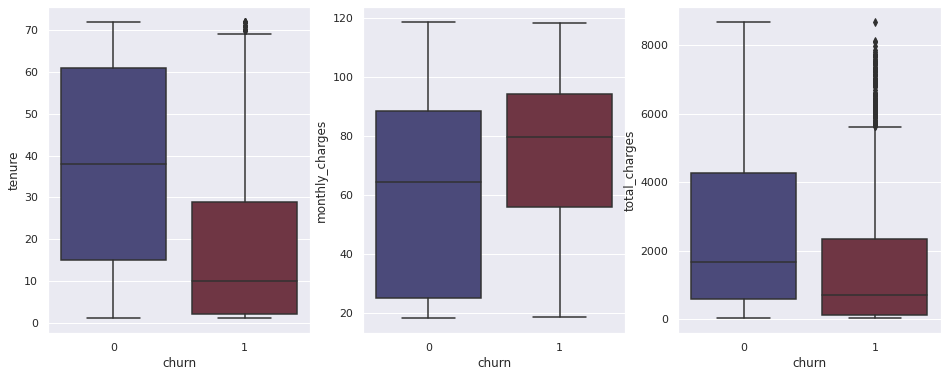

In [ ]:
# Creating boxplots to visualize the continuous data vs churn rate

main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.boxplot(data=df, y='tenure', x='churn', ax=subplots[0], palette='icefire')
sns.boxplot(data=df, y='monthly_charges', x='churn', ax=subplots[1], palette='icefire')
sns.boxplot(data=df, y='total_charges', x='churn', ax=subplots[2], palette='icefire')

# **M | Modeling**

In [18]:
# Defining our features (columns) to train the model

columns = ['senior_citizen', 'partner', 'phone_service', 'device_protection', 'online_security', 'online_backup',
           'tech_support', 'paperless_billing', 'tenure', 'monthly_charges', 'total_charges']

In [19]:
# Generating our training data

train_data = df[columns]
train_labels = df['churn']

In [20]:
# Splitting our data into training set and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

In [21]:
# Building our tree classifier

from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
# Check the accuracy of our model

y_pred = model.predict(X_test)

from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.795260663507109


In [ ]:
# Visualizing our tree using graphviz

import graphviz
columns = list(train_data.columns)

dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled = True, rounded = True)


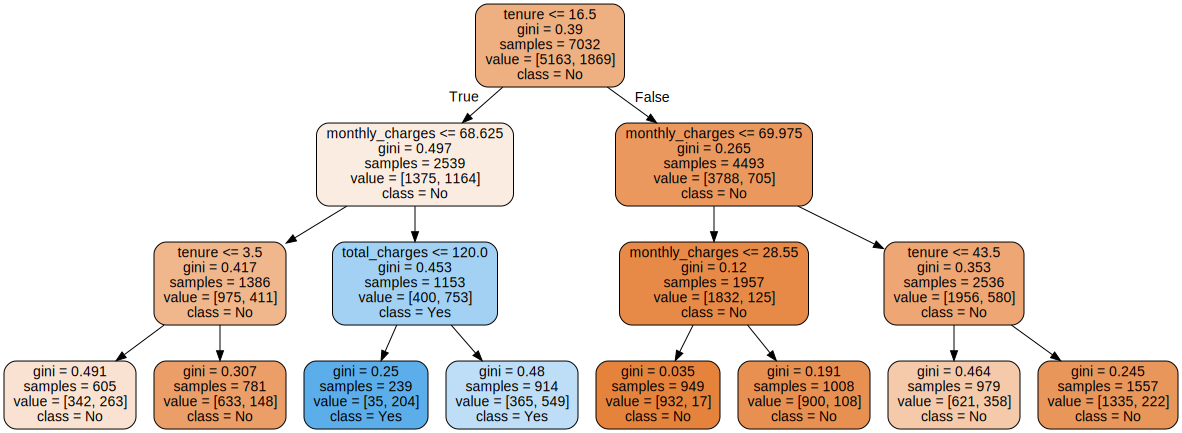

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Generating a new dataframe to predict our outcome (churn rate)

df_predict = train_data.iloc[0:0].copy()

In [ ]:
# Applying the values that we wish to predict on (assuming the customer has 'phone service', is signed up for 'device protection', 'tech support',
# 'paperless billing', and where the tenure is 12 months, monthly charges of 50, and total charges of 70)

df_predict = df_predict.append({
    "senior_citizen":0,
    "partner":0,
    "phone_service":1,
    "device_protection":1,
    "online_security": 0,
    "online_backup":0,
    "tech_support":1,
    "paperless_billing":1,
    "tenure":12,
    "monthly_charges":50,
    "total_charges":70
}, ignore_index=True)

In [ ]:
# Showing the dataframe with assigned values

df_predict

,senior_citizen,partner,phone_service,device_protection,online_security,online_backup,tech_support,paperless_billing,tenure,monthly_charges,total_charges
0,0,0,1,1,0,0,1,1,12,50.0,70.0


In [ ]:
# Use the model that we have trained to predict the churn rate based on the assumed values
# Array will return a prediction where 0 = No churn, 1 = churn

model.predict(df_predict)

array([0])

Based on the outcome of 0, the model has predicted that this customer will not churn. Next, I'd like to improve on the accuracy of our model.

# **Improving the Model Accuracy**

**First Method:** Adding features to the training model without adjusting the parameters.





In [23]:
# Defining our features (columns) to train the model
# Adding all the columns with positive and negative correlation to churn

columns2 = ['senior_citizen', 'partner', 'phone_service', 'device_protection', 'online_security', 'online_backup',
           'tech_support', 'paperless_billing', 'tenure', 'monthly_charges', 'total_charges', 'internet_service_Fiber optic',
           'payment_method_Electronic check', 'contract_Month-to-month', 'dependents', 'internet_service_DSL', 'internet_service_No',
           'payment_method_Bank transfer (automatic)', 'payment_method_Credit card (automatic)', 'contract_One year', 'contract_Two year']

In [24]:
# Generating our training data

train_data2 = df[columns2]
train_labels = df['churn']

In [25]:
# Splitting our data into training set and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels, test_size=0.3, random_state=1)

In [26]:
# Building our tree classifier

from sklearn import tree
model_2 = tree.DecisionTreeClassifier(max_depth = 3, max_features=None)
model_2.fit(train_data2, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
# Check the accuracy of our model

y_pred = model_2.predict(X_test)

from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7976303317535545


Comparison between original features vs new features:

Accuracy: 0.795260663507109 vs First Method/ Accuracy: 0.7976303317535545

**Second Method:** Adding features to the training model + adjusting the max_depth.





In [ ]:
# Adjusting the max_depth to 4

from sklearn import tree
model_3 = tree.DecisionTreeClassifier(max_depth = 4)
model_3.fit(train_data2, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Check the accuracy of our model

y_pred = model_3.predict(X_test)

from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7962085308056872


Comparison between original features vs new features + max_depth of 4:

Accuracy: 0.795260663507109 vs Second Method/ Accuracy: 0.7962085308056872

In [ ]:
# Adjusting the max_depth to 5

from sklearn import tree
model_4 = tree.DecisionTreeClassifier(max_depth = 5)
model_4.fit(train_data2, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Check the accuracy of our model

y_pred = model_4.predict(X_test)

from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7962085308056872


Comparison between original features vs new features + max_depth of 5:

Accuracy: 0.795260663507109 vs Second Method/ Accuracy: 0.7962085308056872

**Third Method:** Adding features to the training model + adjusting the max_depth and min_samples_split

In [ ]:
# Building our tree classifier

from sklearn import tree
model_5 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 5)
model_5.fit(train_data2, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Check the accuracy of our model

y_pred = model_5.predict(X_test)

from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7976303317535545


Comparison between original features vs new features + max_depth of 3 + min_samples_split of 5:

Accuracy: 0.795260663507109 vs Third Method/ Accuracy: 0.7976303317535545

**Fourth Method (?)**: Removing features from the training model

In [ ]:
# Defining our features (columns) to train the model
# Removing columns

columns3 = ['paperless_billing', 'tenure', 'monthly_charges', 'total_charges', 'internet_service_Fiber optic',
           'payment_method_Electronic check', 'contract_Month-to-month', 'internet_service_No', 'contract_One year']

In [ ]:
# 'partner' (-0.15)
# 'dependents' (-0.16)
# 'tenure' (-0.35)
# 'online_security' (-0.17)
# 'tech_support' (-0.16)
# 'total_charges' (-0.20)
'internet_service_DSL' (-0.12)
'internet_service_No' (-0.23)
'payment_method_Bank transfer (automatic)' (-0.12)
'payment_method_Credit card (automatic)' (-0.13)
'contract_One year' (-0.18)
'contract_Two year' (-0.30)
'senior_citizen' (0.15)
'paperless_billing' (0.19)
'monthly_charges' (0.19)
'internet_service Fiber optic' (0.31)
'payment_method Electronic check' (0.30)
'contract_Month-to-month' (0.41)


In [ ]:
# Generating our training data

train_data3 = df[columns3]
train_labels = df['churn']

In [ ]:
# Splitting our data into training set and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data3, train_labels, test_size=0.3, random_state=1)

In [ ]:
# Building our tree classifier

from sklearn import tree
model_6 = tree.DecisionTreeClassifier(max_depth = 3)
model_6.fit(train_data3, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Check the accuracy of our model

y_pred = model_6.predict(X_test)

from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7976303317535545


Comparison between original features vs less features (focusing on correlations higher than 0.19:

Accuracy: 0.795260663507109 vs Fourth Method/ Accuracy: 0.7976303317535545

**Conclusion 1**

It appears that the highest accuracy that we can achieve given the minor changes to features trained and parameters is **0.7976303317535545**.


# **Evaluating Model with Area Under Curve (AUC)**

In [28]:
# Getting the base AUC of our original model

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.6709336345992294

In [ ]:
# Function to assign AUC score to max_depth in our DT model

import numpy as np

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
   model_dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   model_dt.fit(X_train, y_train)   
   
   train_pred = model_dt.predict(X_train)   
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)

   # Add auc score to previous train results

   train_results.append(roc_auc)   
   
   y_pred = model_dt.predict(X_test)   
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)

   # Add auc score to previous test results

   test_results.append(roc_auc)

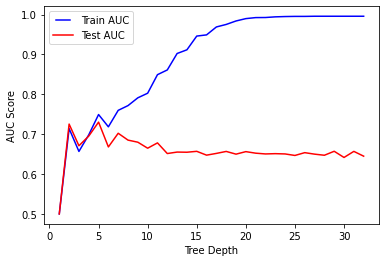

In [ ]:
# Plotting the AUC score vs Tree depth

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label = 'Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label = 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('Tree Depth')
plt.show()


We can see that our DT model overfits for large depth values. After a max_depth of 5, our model is no longer able to successfully predict on the test data. Next, we'll look at the min_samples_split parameter.



In [ ]:
# Function to assign AUC score to min_samples_splits in our DT model

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   model_dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   model_dt.fit(X_train, y_train)   
   
   train_pred = model_dt.predict(X_train)   
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   
   y_pred = model_dt.predict(X_test)   
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

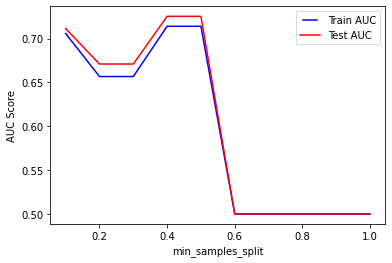

In [ ]:
# Plotting the AUC score vs min_samples_splits

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label = 'Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label = 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('min_samples_split')
plt.show()

We can see that our DT model underfits when we assign 50% to min_samples_split. Next, we'll look at the max_features.

In [ ]:
# Function to assign AUC score to max_features in our DT model

max_features = list(range(1,train_data2.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
   model_dt = tree.DecisionTreeClassifier(max_features=max_feature)
   model_dt.fit(X_train, y_train)   
   
   train_pred = model_dt.predict(X_train)   
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   
   y_pred = model_dt.predict(X_test)   
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

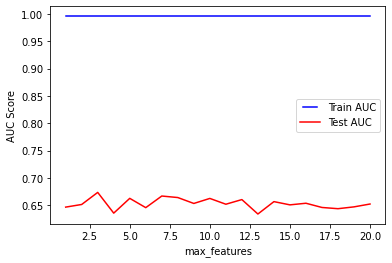

In [ ]:
# Plotting the AUC score vs max_features

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label = 'Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label = 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('max_features')
plt.show()

We can see that the model is overfitted for all values of max_features. Finally, we'll look at the min_samples_leaf.

In [29]:
# Function to assign AUC score to min_samples_leaf in our DT model

min_samples_leafs = list(range(1,train_data2.shape[1]))

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   model_dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   model_dt.fit(X_train, y_train)   
   
   train_pred = model_dt.predict(X_train)   
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   
   y_pred = model_dt.predict(X_test)   
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

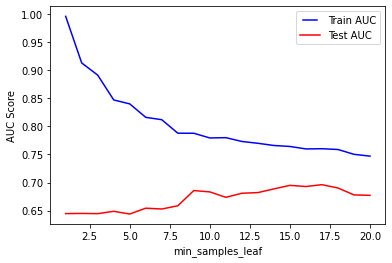

In [31]:
# Plotting the AUC score vs min_samples_leaf

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label = 'Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label = 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('min_samples_leaf')
plt.show()

Similarly to min_samples_split, by increasing the min_samples_leaf we might create an underfitted model. 

# **Final Version to Improve Model Accuracy**

In [32]:
# Defining our features (columns) to train the model
# Adding all the columns with positive and negative correlation to churn

columns_f = ['senior_citizen', 'partner', 'phone_service', 'device_protection', 'online_security', 'online_backup',
           'tech_support', 'paperless_billing', 'tenure', 'monthly_charges', 'total_charges', 'internet_service_Fiber optic',
           'payment_method_Electronic check', 'contract_Month-to-month', 'dependents', 'internet_service_DSL', 'internet_service_No',
           'payment_method_Bank transfer (automatic)', 'payment_method_Credit card (automatic)', 'contract_One year', 'contract_Two year']

In [33]:
# Generating our training data

train_data_f = df[columns_f]
train_labels = df['churn']

In [34]:
# Splitting our data into training set and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_f, train_labels, test_size=0.3, random_state=1)

In [47]:
# Building our tree classifier

from sklearn import tree
model_f = tree.DecisionTreeClassifier(max_depth = 3)
model_f.fit(train_data_f, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
# Check the accuracy of our model

y_pred = model_f.predict(X_test)

from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7976303317535545


# **Conclusion**

It appears that that Decision Tree model achieves the highest accuracy of **Accuracy: 0.7976303317535545** at a max_depth of 3. Other types of models can be considered to improve the accuracy of our prediction.

--------------------------------------------------------------------

Portfolio Website: larikebukit.com/data-science

Notebook references: [AUC score code](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3) |
[Decision Tree parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) | [Selecting Evaluation Metrics](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc)